In [2]:
pip install aspose-words 

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_spss("Birthweight_reduced_kg_SPSS.sav")

In [13]:
df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,Non-smoker,162.0,57.0,23.0,10.0,35.0,179.0,Not low birthweight,Aged < 35,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,Non-smoker,171.0,62.0,19.0,12.0,0.0,183.0,Not low birthweight,Aged < 35,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,Non-smoker,172.0,58.0,31.0,16.0,25.0,185.0,Not low birthweight,Aged 35+,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,Non-smoker,174.0,68.0,26.0,14.0,25.0,189.0,Not low birthweight,Aged < 35,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,Non-smoker,175.0,66.0,30.0,12.0,0.0,184.0,Not low birthweight,Aged < 35,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           42 non-null     float64 
 1   Headcirc     42 non-null     float64 
 2   Length       42 non-null     float64 
 3   Birthweight  42 non-null     float64 
 4   Gestation    42 non-null     float64 
 5   mage         42 non-null     float64 
 6   smoker       42 non-null     category
 7   mheight      42 non-null     float64 
 8   mppwt        42 non-null     float64 
 9   fage         42 non-null     float64 
 10  fedyrs       42 non-null     float64 
 11  fnocig       42 non-null     float64 
 12  fheight      42 non-null     float64 
 13  lowbwt       42 non-null     category
 14  mage35       42 non-null     category
 15  mnocig       42 non-null     float64 
dtypes: category(3), float64(13)
memory usage: 4.9 KB


In [10]:
df.duplicated().value_counts()

False    42
dtype: int64

In [11]:
df.isnull().sum() 

ID             0
Headcirc       0
Length         0
Birthweight    0
Gestation      0
mage           0
smoker         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
mnocig         0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00
fage,42.0,28.904762,6.863866,19.00,23.00,29.500,32.0000,46.00
fedyrs,42.0,13.666667,2.160247,10.00,12.00,14.000,16.0000,16.00



### Data Insights

In the given dataset, we have two types of mothers one who Non-smoker and another who are Smoker. So, we can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [15]:
df[df['smoker'] == 'Non-smoker'].shape[0]

20

In [16]:
df[df['smoker'] == 'Smoker'].shape[0]

22

In [19]:
df_non_smoker = df[(df.smoker == 'Non-smoker')]

In [20]:
df_smoker = df[(df.smoker == 'Smoker')]

In [24]:
df_smoker.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
20,792.0,38.0,53.0,3.64,40.0,20.0,Smoker,170.0,59.0,24.0,12.0,12.0,185.0,Not low birthweight,Aged < 35,2.0
21,1388.0,33.0,51.0,3.14,41.0,22.0,Smoker,160.0,53.0,24.0,16.0,12.0,176.0,Not low birthweight,Aged < 35,7.0
22,575.0,30.0,50.0,2.78,37.0,19.0,Smoker,165.0,60.0,20.0,14.0,0.0,183.0,Not low birthweight,Aged < 35,7.0
23,569.0,35.0,50.0,2.51,39.0,22.0,Smoker,159.0,52.0,23.0,14.0,25.0,200.0,Low birthweight,Aged < 35,7.0
24,1363.0,30.0,48.0,2.37,37.0,20.0,Smoker,163.0,47.0,20.0,10.0,35.0,185.0,Low birthweight,Aged < 35,7.0


### Q1. What is the mean birth weight for babies of non-smoking mothers?

In [38]:
Baby_Weight_Non_Smoker = list(df_non_smoker["Birthweight"])

In [39]:
x = statistics.mean(Baby_Weight_Non_Smoker)

In [40]:
x

3.5095

### Q2. What is the mean birth weight for babies of smoking mothers?

In [34]:
Baby_Weight_Smoker = list(df_smoker["Birthweight"])

In [36]:
y = statistics.mean(Baby_Weight_Smoker)

In [37]:
y

3.1340909090909093

### Q3. What is the mean head circumference for babies of non-smoking mothers?

In [41]:
Baby_Head_Circumference = list(df_non_smoker["Headcirc"])

In [42]:
z = statistics.mean(Baby_Head_Circumference)

In [43]:
z

35.05

### Q4. What is the mean gestational age at birth for babies of smoking mothers?

In [45]:
df_smoker[['Gestation']].mean()

Gestation    38.954545
dtype: float64

### Q5. What is the maximum head circumference for babies of non-smoking mothers?

In [46]:
df_non_smoker[['Headcirc']].max()

Headcirc    39.0
dtype: float64

### Q6. What is the minimum gestational age at birth for babies of smoking mothers?

In [50]:
df_smoker[['Gestation']].min()

Gestation    33.0
dtype: float64

### Q7. Based on the dataset you have, out of the two, which one would be a better bet:



Pregnancy period in smoking mothers is shorter or
Pregnancy period in non-smoking mothers is shorter

In [51]:
df_smoker[['Gestation']].mean()

Gestation    38.954545
dtype: float64

In [52]:
df_non_smoker[['Gestation']].mean()

Gestation    39.45
dtype: float64

### Q8. Justify the above choice in a few words.

Pregnancy period in smoking mothers is shorter than Pregnancy period in non-smoking mothers.

### Q9. What is the baby birth weight range for babies of smoking mothers?

In [75]:
df_smoker[['Birthweight']].max()

Birthweight    4.57
dtype: float64

In [66]:
df_smoker[['Birthweight']].min()

Birthweight    1.92
dtype: float64

In [78]:
Range_smoker = df_smoker[['Birthweight']].max() - df_smoker[['Birthweight']].min()

In [79]:
Range_smoker

Birthweight    2.65
dtype: float64

Baby birth weight range of smoking mothers is from 1.92 kg to 4.57. Range = 2.65

### Q10. In your own words describe what the value of the above range for baby's birthweight tells us about smoking versus non-smoking mothers?

In [76]:
df_non_smoker[['Birthweight']].max()

Birthweight    4.55
dtype: float64

In [71]:
df_non_smoker[['Birthweight']].min()

Birthweight    2.65
dtype: float64

In [80]:
Range_non_smoker = df_non_smoker[['Birthweight']].max() - df_non_smoker[['Birthweight']].min()

In [81]:
Range_non_smoker

Birthweight    1.9
dtype: float64

Range for baby's birthweight (1.9) of non-smoking mothers is smaller than range for baby's birthweight (2.65) of smoking mothers.

### Q11. Are head circumference data for babies of smoking mothers normally distributed?

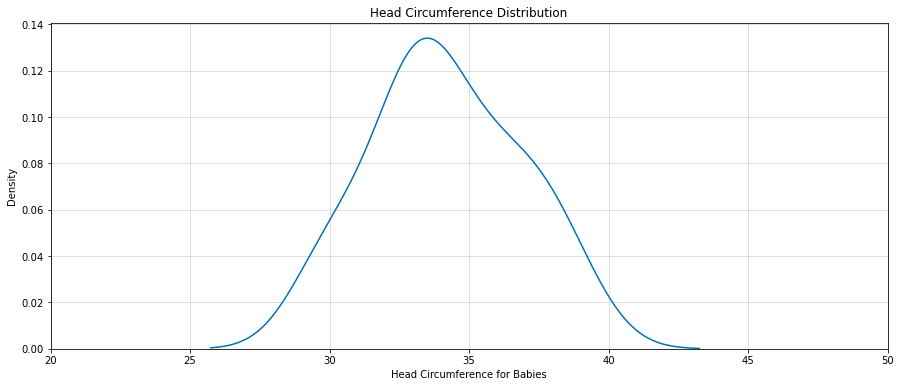

In [83]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['smoker'] == 'Smoker', 'Headcirc'], label = 'Head circumference for babies of smoking mothers')
#sns.kdeplot(df.loc[df['left'] == 1, 'average_montly_hours'], label = 'Ex-Employees')
plt.xlim(left=20, right=50)
plt.xlabel('Head Circumference for Babies')
plt.ylabel('Density')
plt.title('Head Circumference Distribution');

In [84]:
df_smoker[['Headcirc']].mean()

Headcirc    34.181818
dtype: float64

In [85]:
df_smoker[['Headcirc']].median()

Headcirc    34.0
dtype: float64

In [87]:
df_smoker[['Headcirc']].mode()

,Headcirc
0,33.0


According to the graph, there is a distribution close to the normal distribution. However, in a normal distribution, mean median and mode must be equal to each other. (Mode < Median < Mean) In this situation Data is Positive Skew.

### Q12. What is the significance value for the above on the Shapiro-Wilk test?

In [88]:
from scipy import stats

In [89]:
a = list(df_smoker["Headcirc"])

In [90]:
shapiro_test = stats.shapiro(a)
shapiro_test

ShapiroResult(statistic=0.9536523818969727, pvalue=0.3723871409893036)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.372 > 0.05 so head circumference data for babies of smoking mothers are normally distributed. 

### Q13. What is the standard score (Z-score) for head circumference of 35.05 (X=35.05) in non-smoking mothers?

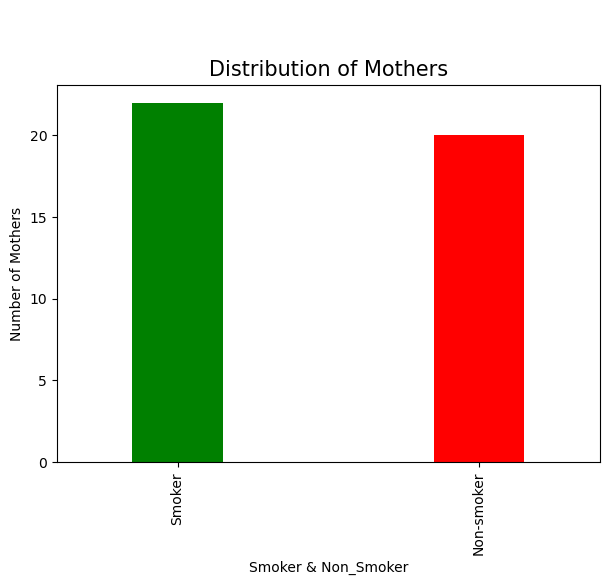

In [63]:
plt.figure(figsize=(7,5), dpi=100)
g = df.smoker.value_counts().plot(kind="bar", color=["green", "red"], width=0.3)
plt.title('Distribution of Mothers', fontsize = 15)
plt.xlabel("Smoker & Non_Smoker")
plt.ylabel("Number of Mothers")
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+5));